# **SMAI Assignment - 2**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

## _Problem - 1_

> ### **Utils**

In [1]:
from read_dataset_P1 import main

from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [2]:
random_state = 42

a1_dataset_path = "../Datasets/A1_pictionary.npy"
a1_data_column = 1 # 1 for resnet, 2 for VIT

pictionary_dataset_drawer_path = "../Datasets/SMAI-PCAdataset/Pictionary/drawer_attributes.csv"
pictionary_dataset_guesser_path = "../Datasets/SMAI-PCAdataset/Pictionary/guesser_attributes.csv"

> ### **Load Dataset**

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


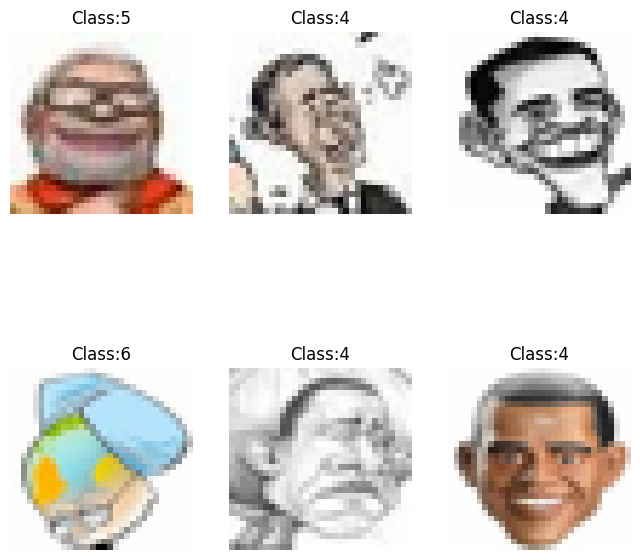

In [3]:
X, labels = main()

> ### **Plot the the relationship between the cumulative explained variance and the number of principal components.**

In [4]:
data = np.reshape(X, (X.shape[0], -1))
m, n = data.shape
data.shape

(672, 3072)

In [5]:
mean = np.mean(data, axis=0)
centered_data = data - mean

In [6]:
cov_matrix = np.cov(centered_data, rowvar=False)

cov_matrix.shape

(3072, 3072)

In [7]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [8]:
# sorted_indices = np.argsort(eigenvalues)[::-1]
# eigenvalues = eigenvalues[sorted_indices]
# eigenvectors = eigenvectors[:, sorted_indices]

eigenvalues = np.flip(eigenvalues)
eigenvectors = np.flip(eigenvectors, axis=1)

eigenvalues.shape, eigenvectors.shape

((3072,), (3072, 3072))

In [9]:
threshold = 1e-13
eigenvalues[np.abs(eigenvalues) < threshold] = 0

In [10]:
# for i in eigenvalues:
#     print(i)

In [11]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

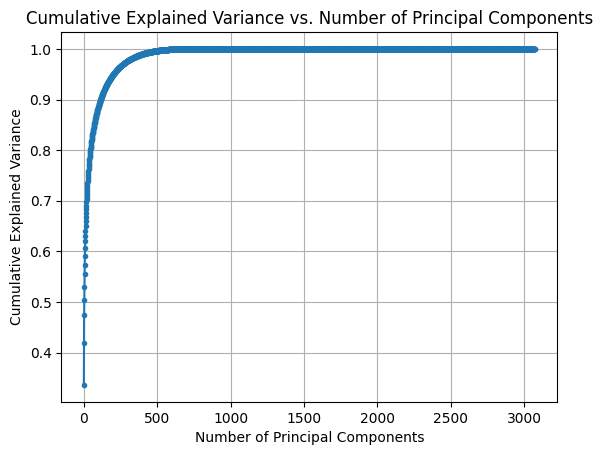

In [12]:
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='.')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

> ### **Perform the dimensionality reduction on features that you have used for assignment 1.**

In [13]:
a1_dataset = np.array(np.load(a1_dataset_path, allow_pickle=True))

print("Dataset Shape - ", a1_dataset.shape)
print("Data row shape", a1_dataset[0].shape)
a1_labels = a1_dataset[:,3]
a1_data = a1_dataset[:,a1_data_column+1]

print("Data Shape - ", a1_data.shape)


Dataset Shape -  (1500, 5)
Data row shape (5,)
Data Shape -  (1500,)


In [14]:
a1_data = [i.reshape(-1) for i in a1_data]
a1_data = np.array(a1_data)
print("Data Shape - ", a1_data.shape)

Data Shape -  (1500, 512)


In [15]:
a1_mean = np.mean(a1_data, axis=0)
a1_centered_data = a1_data - a1_mean

In [16]:
cov_matrix = np.cov(a1_centered_data, rowvar=False)

cov_matrix.shape

(512, 512)

In [17]:
a1_eigenvalues, a1_eigenvectors = np.linalg.eigh(cov_matrix)

In [18]:
a1_eigenvalues = np.flip(a1_eigenvalues)
a1_eigenvectors = np.flip(a1_eigenvectors, axis=1)

a1_eigenvalues.shape, a1_eigenvectors.shape

((512,), (512, 512))

In [19]:
a1_explained_variance_ratio = a1_eigenvalues / np.sum(a1_eigenvalues)
a1_cumulative_explained_variance = np.cumsum(a1_explained_variance_ratio)

# Choose the number of components that explain 95% of the variance
n_components = np.argmax(a1_cumulative_explained_variance >= 0.95) + 1

In [20]:
# Project a1_data onto the eigenvectors

a1_projected_data = (a1_eigenvectors[:,:n_components].T @ a1_centered_data.T).T
a1_projected_data.shape

(1500, 204)

In [21]:
# Split the projected data and labels

X_train, X_test, y_train, y_test = train_test_split(a1_data, a1_labels, test_size=0.2, random_state=random_state)

In [22]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy Score - ", accuracy_score(y_test, y_pred))
print("Precision Score - ", precision_score(y_test, y_pred, zero_division=0, average='weighted'))
print("Recall Score - ", recall_score(y_test, y_pred, zero_division=0, average='weighted'))
print("F1 Score - ", f1_score(y_test, y_pred, zero_division=0, average='weighted'))

Accuracy Score -  0.27
Precision Score -  0.27779761904761907
Recall Score -  0.27
F1 Score -  0.2551921411921412


In [23]:
for i in range(75, 100, 5):
    n_components = np.argmax(a1_cumulative_explained_variance >= i/100) + 1
    a1_projected_data = (a1_eigenvectors[:,:n_components].T @ a1_centered_data.T).T
    print("Variance =",i/100, "No of Params =", a1_projected_data.shape[1])
    # Split the projected data and labels
    X_train, X_test, y_train, y_test = train_test_split(a1_projected_data, a1_labels, test_size=0.2, random_state=random_state)

    knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print("\tAccuracy Score - ", accuracy_score(y_test, y_pred))
    print("\tPrecision Score - ", precision_score(y_test, y_pred, zero_division=0, average='weighted'))
    print("\tRecall Score - ", recall_score(y_test, y_pred, zero_division=0, average='weighted'))
    print("\tF1 Score - ", f1_score(y_test, y_pred, zero_division=0, average='weighted'))


Variance = 0.75 No of Params = 52
	Accuracy Score -  0.26666666666666666
	Precision Score -  0.2519616402116402
	Recall Score -  0.26666666666666666
	F1 Score -  0.2455964220964221
Variance = 0.8 No of Params = 69
	Accuracy Score -  0.26
	Precision Score -  0.2521772486772486
	Recall Score -  0.26
	F1 Score -  0.24262554112554113
Variance = 0.85 No of Params = 94
	Accuracy Score -  0.26666666666666666
	Precision Score -  0.26096031746031745
	Recall Score -  0.26666666666666666
	F1 Score -  0.2481276871276871
Variance = 0.9 No of Params = 133
	Accuracy Score -  0.26666666666666666
	Precision Score -  0.2685674603174603
	Recall Score -  0.26666666666666666
	F1 Score -  0.25251332001332005
Variance = 0.95 No of Params = 204
	Accuracy Score -  0.27
	Precision Score -  0.2744007936507937
	Recall Score -  0.27
	F1 Score -  0.2560509675509675


#### Comparison of Results

As we can see that even after we reduced the number of dimensions to lesser (here = 202, covering 95% variance of the data), the accuracy of the model is still the same. Even other scoring metrics remain the same (slighly better in f1 score). 

One of the reason behing it is that when we get number of dimensions reduced using PCA, we are effectively getting new dimensions which are linear combinations of the original dimensions. So, the information is still the same, just the representation is different, and we require lesser number of dimensions to represent the almost same information.

> ### **Observe the impact of dimensionality reduction on the CFW dataset.**

In [24]:
# Split the projected data and labels
n_components = np.argmax(cumulative_explained_variance >= 95/100) + 1
projected_data = (eigenvectors[:,:n_components].T @ centered_data.T).T
X_train, X_test, y_train, y_test = train_test_split(projected_data, labels, test_size=0.2, random_state=random_state)

max_score_index = 1
max_score = 0

for i in trange(1,10):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    if accuracy_score(y_test, y_pred) > max_score:
        max_score = accuracy_score(y_test, y_pred)
        max_score_index = i

100%|██████████| 9/9 [00:00<00:00, 46.57it/s]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=random_state)

knn = KNeighborsClassifier(n_neighbors=max_score_index, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy Score - ", accuracy_score(y_test, y_pred))

Accuracy Score -  0.45185185185185184


100%|██████████| 3071/3071 [01:20<00:00, 38.29it/s]


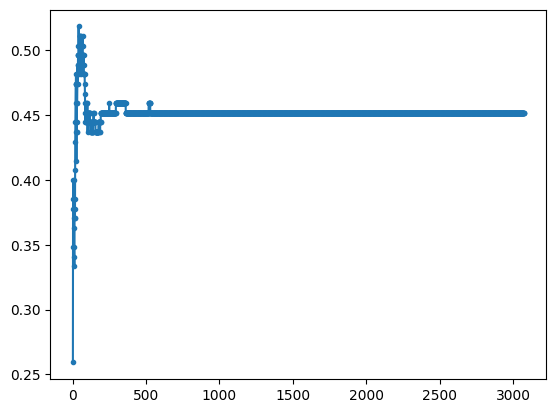

In [26]:
accuracies = list()
# projected_data_max = (eigenvectors.T @ centered_data.T).T
projected_data_max = np.dot(centered_data, eigenvectors)

for n_components in trange(2, n+1):
    projected_data = projected_data_max[:, :n_components]

    # Split the projected data and labels
    X_train, X_test, y_train, y_test = train_test_split(projected_data, labels, test_size=0.2, random_state=random_state)

    knn = KNeighborsClassifier(n_neighbors=max_score_index, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(np.arange(2, n+1), accuracies, marker='.')
plt.show()


> ### **Pictionary Dataset**

In [27]:
drawer_data = np.genfromtxt(pictionary_dataset_drawer_path, delimiter=',', skip_header=1)
drawer_data = drawer_data[:, 1:]
guesser_data = np.genfromtxt(pictionary_dataset_guesser_path, delimiter=',', skip_header=1)
guesser_data = guesser_data[:, 1:]

print(drawer_data.shape, guesser_data.shape)

(100, 8) (100, 6)


In [28]:
drawer_mean = np.mean(drawer_data, axis=0)
drawer_centered_data = drawer_data - drawer_mean

guesser_mean = np.mean(guesser_data, axis=0)
guesser_centered_data = guesser_data - guesser_mean

In [29]:
drawer_cov_matrix = np.cov(drawer_centered_data, rowvar=False)
guesser_cov_matrix = np.cov(guesser_centered_data, rowvar=False)

drawer_cov_matrix.shape, guesser_cov_matrix.shape

((8, 8), (6, 6))

In [30]:
drawer_eigenvalues, drawer_eigenvectors = np.linalg.eigh(drawer_cov_matrix)
guesser_eigenvalues, guesser_eigenvectors = np.linalg.eigh(guesser_cov_matrix)

In [31]:
drawer_eigenvalues = np.flip(drawer_eigenvalues)
drawer_eigenvectors = np.flip(drawer_eigenvectors, axis=1)

guesser_eigenvalues = np.flip(guesser_eigenvalues)
guesser_eigenvectors = np.flip(guesser_eigenvectors, axis=1)

drawer_eigenvalues.shape, drawer_eigenvectors.shape, guesser_eigenvalues.shape, guesser_eigenvectors.shape

((8,), (8, 8), (6,), (6, 6))

In [32]:
drawer_explained_variance_ratio = drawer_eigenvalues / np.sum(drawer_eigenvalues)
drawer_cumulative_explained_variance = np.cumsum(drawer_explained_variance_ratio)

guesser_explained_variance_ratio = guesser_eigenvalues / np.sum(guesser_eigenvalues)
guesser_cumulative_explained_variance = np.cumsum(guesser_explained_variance_ratio)

# Choose the number of components that explain 95% of the variance
drawer_n_components = np.argmax(drawer_cumulative_explained_variance >= 0.95) + 1
guesser_n_components = np.argmax(guesser_cumulative_explained_variance >= 0.95) + 1

In [33]:
# Project a1_data onto the eigenvectors

drawer_projected_data = (drawer_eigenvectors[:,:drawer_n_components].T @ drawer_centered_data.T).T
guesser_projected_data = (guesser_eigenvectors[:,:guesser_n_components].T @ guesser_centered_data.T).T

drawer_projected_data.shape, guesser_projected_data.shape

((100, 1), (100, 2))

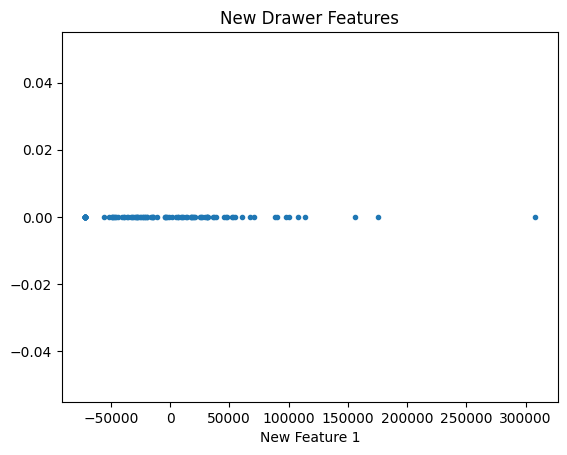

In [34]:
plt.title('New Drawer Features')
plt.xlabel('New Feature 1')
plt.plot(drawer_projected_data[:,0], [0 for _ in range(drawer_projected_data.shape[0])], marker='.', linestyle='None')
plt.show()

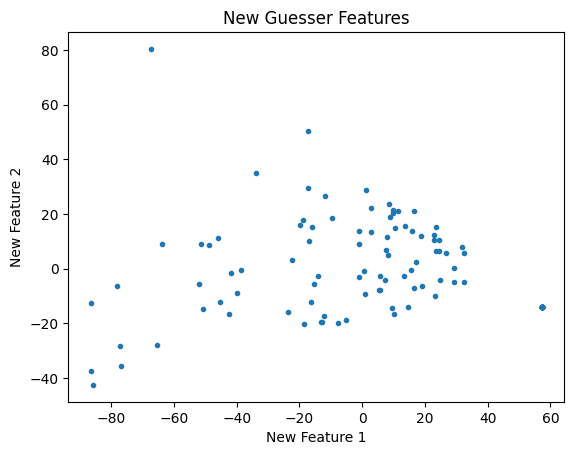

In [35]:
plt.title('New Guesser Features')
plt.xlabel('New Feature 1')
plt.ylabel('New Feature 2')
plt.plot(guesser_projected_data[:,0], guesser_projected_data[:,1], marker='.', linestyle='None')
plt.show()


> #### What does each of the new axes that are obtained from PCA represent ?

In [36]:
drawer_loadings = (drawer_eigenvectors * np.sqrt(drawer_eigenvalues))[:drawer_n_components]
guesser_loadings = (guesser_eigenvectors * np.sqrt(guesser_eigenvalues))[:guesser_n_components]

In [37]:
drawer_loadings

array([[ 6.16576017e+04,  1.56327853e-02, -1.68651226e-05,
        -1.58207343e-05, -4.47460285e-07, -2.46362582e-07,
        -9.39311845e-08,  1.92431550e-07]])

In [38]:
guesser_loadings

array([[-1.19142870e+00, -5.17867128e-01, -3.11291730e-01,
        -8.20339023e-01, -4.34465394e-02,  7.74543882e-03],
       [-8.55160075e+00,  1.31895153e+01, -4.03589066e+00,
         1.78851018e-02,  1.28738270e-04,  6.56236194e-05]])

> Observations

As we can see from the drawer's loading matrix, it is mostly dependent on the value of the first feature (d_area_median). So, we can say that the first principal component is mostly dependent on the first feature, and thus, it if equivalent to d_area_median.

From the guesser loading matrix, we can see that it has two principal components.
1. Principal Component 1:

    It has strong positive loadings for g_noofmessage_median, g_lastmessagetime_median, g_rangemessagetime_median, indicating that this component is related to the number of messages, the last message time, and the range of message times.

    It has a strong negative loading for g_firstmessagetime_median, which means that this component is inversely related to the first message time.

    It also has negative loadings for g_pcgamesconfusion and g_entropy, suggesting a weak inverse relationship with PC games confusion and entropy.

2. Principal Component 2:

    It has a strong positive loading for g_firstmessagetime_median, indicating that this component is primarily related to the first message time.
    
    It has a strong positive loading for g_pcgamesconfusion, suggesting a strong relationship with PC games confusion.
    It has a negative loading for g_noofmessage_median, indicating a weak inverse relationship with the number of messages.
    
    It also has a negative loading for g_lastmessagetime_median, g_rangemessagetime_median, and g_entropy, suggesting some level of inverse relationship with these variables.

